#### **EXPLORATORY DATA ANALYSIS**

IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

SET STYLE FOR VISUALISATIONS

In [3]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize']=(14,8)
plt.rcParams['font.size'] = 10

In [4]:
data_path = '/Users/starboy/Documents/Projects/Airbnb/engineered_data_for_eda.csv'
try:
    df=pd.read_csv(data_path)
    df['last_review'] = pd.to_datetime(df['last_review'])
    print(f"\nDATASET LOADED: ")
    print(f" -> Rows: {len(df):,}")
    print(f" -> Columns: {len(df.columns)}")
except FileNotFoundError:
    print("File not found")


DATASET LOADED: 
 -> Rows: 50,530
 -> Columns: 45


ENGINEERING FEATURES AVAILABLE

In [8]:
print(f"\nTIME FEATURES: ")
print(f" -> Years: {df['year'].min():.0f} - {df['year'].max():.0f}")
print(f" -> Seasons: {df['season'].unique()}")
print(f"\nDEMAND FEATURES: ")
print(f" -> Demand levels: {df['demand_level'].unique()}")
print(f" -> Avg reviews/month: {df['reviews_per_month'].mean():.2f}")
print("\nPRICE FEATURES: ")
print(f" -> Price range: ${df['price'].min():.0f} - ${df['price'].max():.0f}")
print("\nBOOKING FEATURES: ")
print(f" -> Stay types: {df['stay_length_category'].unique()}")
print(f" -> Most common: {df['stay_length_category'].value_counts().index[0]}")


TIME FEATURES: 
 -> Years: 2012 - 2025
 -> Seasons: ['Fall' 'Summer' 'Winter']

DEMAND FEATURES: 
 -> Demand levels: ['Medium' 'Low' 'Very High' 'High']
 -> Avg reviews/month: 1.40

PRICE FEATURES: 
 -> Price range: $50 - $1200

BOOKING FEATURES: 
 -> Stay types: ['Monthly' 'Weekly' 'Long-term' 'Nightly']
 -> Most common: Weekly


**SEASONALITY HEATMAP**

In [9]:
# MAP THE MONTHS TO THEIR NAME
month_names = {1:'Jan',
               2:'Feb',
               3:'Mar',
               4:'Apr',
               5:'May',
               6:'Jun',
               7:'Jul',
               8:'Aug',
               9:'Sep',
               10:'Oct',
               11:'Nov',
               12:'Dec'
            }

In [10]:
seasonality_data = df.groupby(['month','season']).agg({
    'reviews_per_month': ['mean','median','count'],
    'price':'mean',
    'availability_365':'mean'
}).round(2)

In [11]:
print("\nSEASONALITY BY MONTH: ")
print(seasonality_data)


SEASONALITY BY MONTH: 
             reviews_per_month                 price availability_365
                          mean median  count    mean             mean
month season                                                         
1     Winter              1.04   0.67   2589  629.04           152.54
2     Winter              2.25   1.92   5484  624.51           162.02
3     Summer              0.56   0.30   2074  632.89            96.77
4     Summer              0.62   0.39   2682  627.77           110.91
5     Summer              0.93   0.64   6123  632.90           140.06
6     Summer              2.32   2.05  17564  624.85           147.64
7     Summer              0.30   0.14   1789  615.13            95.81
8     Summer              0.28   0.15   2415  628.85            99.32
9     Fall                0.36   0.19   2078  638.07           111.04
10    Fall                0.41   0.23   2185  617.56           121.63
11    Fall                0.49   0.29   1792  641.92           111

In [12]:
heatmap_data=df.groupby('month')['reviews_per_month'].agg(['mean','median','std']).round(3)
heatmap_data['month_name']=heatmap_data.index.map(month_names)

print("\nMONTHLY DEMAND (Reviews per Month): ")
print(heatmap_data)


MONTHLY DEMAND (Reviews per Month): 
        mean  median    std month_name
month                                 
1      1.043    0.67  1.055        Jan
2      2.252    1.92  1.928        Feb
3      0.558    0.30  0.678        Mar
4      0.623    0.39  0.676        Apr
5      0.930    0.64  0.972        May
6      2.322    2.05  1.691        Jun
7      0.297    0.14  0.435        Jul
8      0.278    0.15  0.401        Aug
9      0.359    0.19  0.531        Sep
10     0.407    0.23  0.512        Oct
11     0.494    0.29  0.682        Nov
12     0.655    0.37  0.803        Dec


**SEASONALITY VISUALIZATIONS**

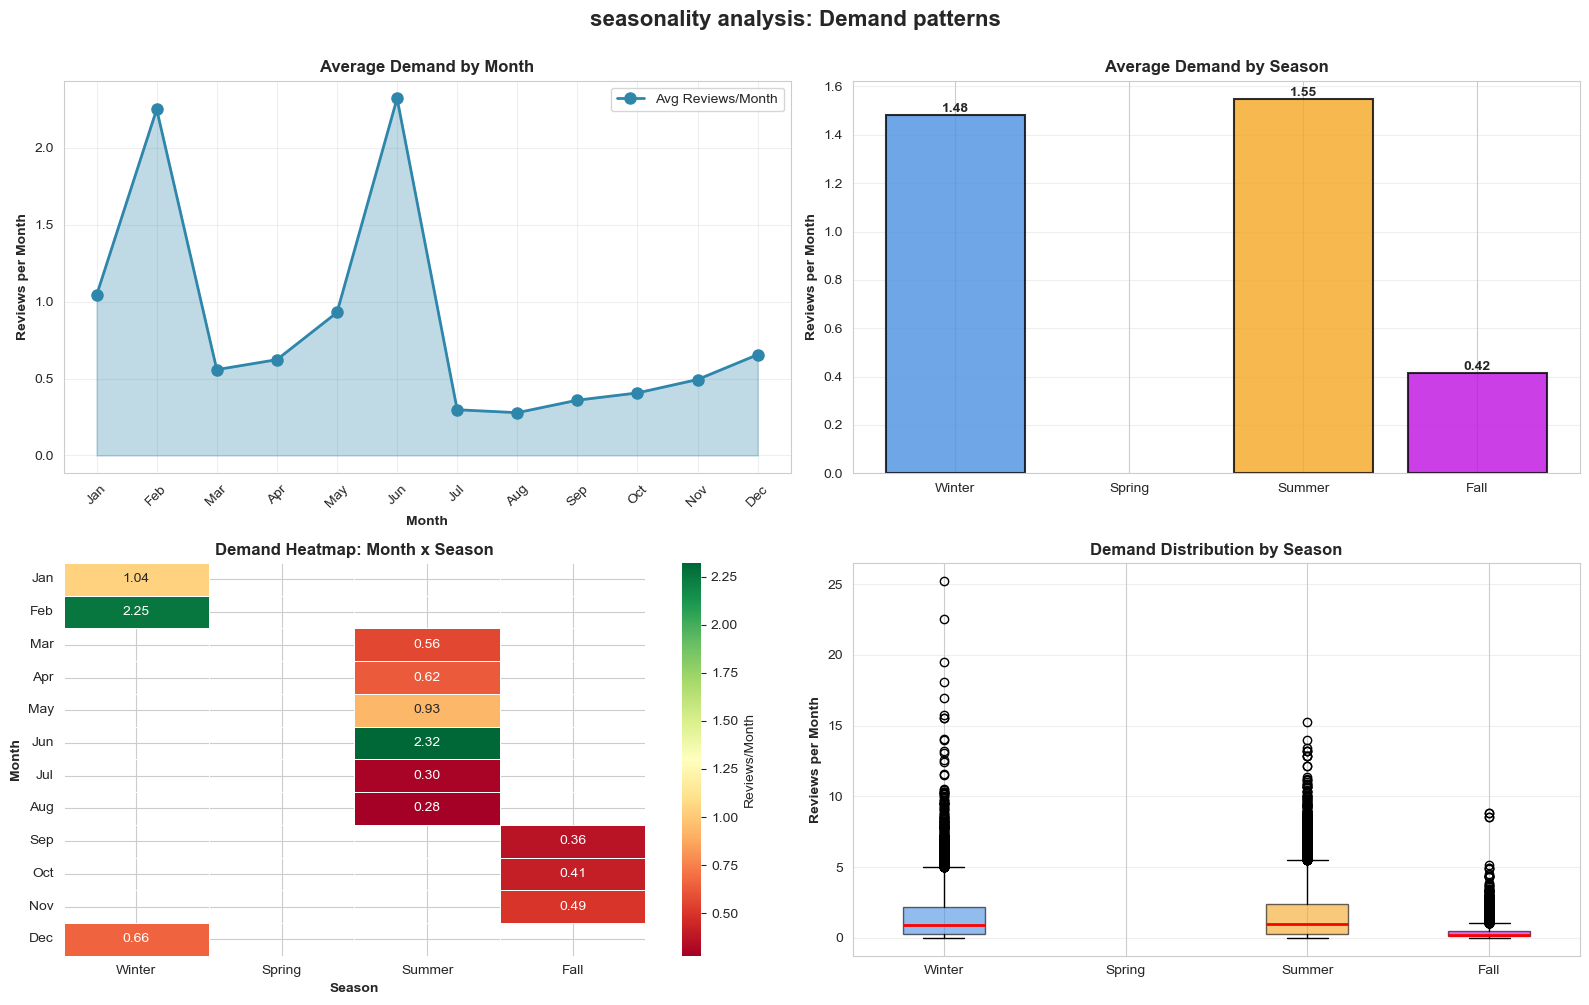

In [16]:
# DEMAND BY MONTH
fig,axes = plt.subplots(2,2,figsize=(16,10))
fig.suptitle('seasonality analysis: Demand patterns', fontsize=16, fontweight='bold',y=1.00)

# 1. line chart: reviews by month
ax1=axes[0,0]
monthly_reviews=df.groupby('month')['reviews_per_month'].mean()
ax1.plot(monthly_reviews.index, monthly_reviews.values, marker='o',linewidth=2,
         markersize=8, color='#2E86AB', label='Avg Reviews/Month')
ax1.fill_between(monthly_reviews.index, monthly_reviews.values, alpha=0.3, color='#2E86AB')
ax1.set_xlabel('Month', fontweight='bold')
ax1.set_ylabel('Reviews per Month', fontweight='bold')
ax1.set_title('Average Demand by Month', fontweight='bold')
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels([month_names[i] for i in range(1, 13)], rotation=45)
ax1.grid(True, alpha=0.3)
ax1.legend()

# 2. Bar chart : Demand by season
ax2 = axes[0, 1]
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
season_reviews = df.groupby('season')['reviews_per_month'].mean().reindex(season_order)
colors = ['#4A90E2', '#7ED321', '#F5A623', '#BD10E0']
bars = ax2.bar(season_order, season_reviews.values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Reviews per Month', fontweight='bold')
ax2.set_title('Average Demand by Season', fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

# 3. HEATMAP: MONTH x SEASON deman
ax3 = axes[1, 0]
heatmap_pivot = df.pivot_table(values='reviews_per_month', index='month', 
                                columns='season', aggfunc='mean')
heatmap_pivot = heatmap_pivot.reindex(columns=season_order)
sns.heatmap(heatmap_pivot, annot=True, fmt='.2f', cmap='RdYlGn', ax=ax3, 
            cbar_kws={'label': 'Reviews/Month'}, linewidths=0.5)
ax3.set_xlabel('Season', fontweight='bold')
ax3.set_ylabel('Month', fontweight='bold')
ax3.set_title('Demand Heatmap: Month x Season', fontweight='bold')
ax3.set_yticklabels([month_names[i] for i in range(1, 13)], rotation=0)

# 4. Box plot: Distribution by Season
ax4 = axes[1, 1]
season_data = [df[df['season'] == season]['reviews_per_month'].values for season in season_order]
bp = ax4.boxplot(season_data, labels=season_order, patch_artist=True, 
                  medianprops=dict(color='red', linewidth=2))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)
ax4.set_ylabel('Reviews per Month', fontweight='bold')
ax4.set_title('Demand Distribution by Season', fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


INSIGHTS

In [17]:
season_stats=df.groupby('season')['reviews_per_month'].agg(['mean','median','std','count']).round(3)
season_stats=season_stats.reindex(season_order)

In [21]:
for season in season_order:
    if season in season_stats.index:
        mean_val= season_stats.loc[season,'mean']
        median_val = season_stats.loc[season,'median']
        std_val= season_stats.loc[season,'std']
        count = season_stats.loc[season,'count']
        print(f"\n{season.upper()}: ")
        print(f" -> Average: {mean_val:.2f} reviews/month")
        print(f" -> Median: {median_val:.2f} reviews/month")
        print(f" -> Std Dev: {std_val:.2f}")
        print(f" -> Listings: {count:,}")


WINTER: 
 -> Average: 1.48 reviews/month
 -> Median: 0.92 reviews/month
 -> Std Dev: 1.65
 -> Listings: 11,828.0

SPRING: 
 -> Average: nan reviews/month
 -> Median: nan reviews/month
 -> Std Dev: nan
 -> Listings: nan

SUMMER: 
 -> Average: 1.55 reviews/month
 -> Median: 1.00 reviews/month
 -> Std Dev: 1.59
 -> Listings: 32,647.0

FALL: 
 -> Average: 0.42 reviews/month
 -> Median: 0.22 reviews/month
 -> Std Dev: 0.58
 -> Listings: 6,055.0


In [20]:
print("\nMONTHLY BREAKDOWN:")
monthly_stats = df.groupby('month')['reviews_per_month'].agg(['mean', 'count']).round(2)
for month in range(1, 13):
    if month in monthly_stats.index:
        mean_val = monthly_stats.loc[month, 'mean']
        count = monthly_stats.loc[month, 'count']
        month_name_str = month_names[month]
        print(f"   • {month_name_str:>3}: {mean_val:>5.2f} reviews/month ({int(count):,} listings)")


MONTHLY BREAKDOWN:
   • Jan:  1.04 reviews/month (2,589 listings)
   • Feb:  2.25 reviews/month (5,484 listings)
   • Mar:  0.56 reviews/month (2,074 listings)
   • Apr:  0.62 reviews/month (2,682 listings)
   • May:  0.93 reviews/month (6,123 listings)
   • Jun:  2.32 reviews/month (17,564 listings)
   • Jul:  0.30 reviews/month (1,789 listings)
   • Aug:  0.28 reviews/month (2,415 listings)
   • Sep:  0.36 reviews/month (2,078 listings)
   • Oct:  0.41 reviews/month (2,185 listings)
   • Nov:  0.49 reviews/month (1,792 listings)
   • Dec:  0.66 reviews/month (3,755 listings)


**PEAK vs OFF-PEAK**

In [24]:
peak_seasons = df[df['season'].isin(['Summer', 'Winter'])]['reviews_per_month'].mean()
offpeak_seasons = df[df['season'].isin(['Fall'])]['reviews_per_month'].mean()

print(f"\nPEAK vs OFF-PEAK:")
print(f" -> Peak season avg: {peak_seasons:.2f} reviews/month")
print(f" -> Off-peak avg: {offpeak_seasons:.2f} reviews/month")
print(f" -> Difference: {((peak_seasons - offpeak_seasons) / offpeak_seasons * 100):.1f}")


PEAK vs OFF-PEAK:
 -> Peak season avg: 1.53 reviews/month
 -> Off-peak avg: 0.42 reviews/month
 -> Difference: 267.5


**STAY TYPE**

In [25]:
booking_analysis = df.groupby('stay_length_category').agg({
    'reviews_per_month': ['mean', 'median', 'std', 'count'],
    'price': 'mean',
    'availability_365': 'mean',
    'demand_level': lambda x: (x == 'Very High').sum() / len(x) * 100
}).round(2)

In [27]:
print("\nBOOKING TYPE PERFORMANCE: ")
booking_analysis


BOOKING TYPE PERFORMANCE: 


reviews_per_month                       price  \
                                  mean median   std  count    mean   
stay_length_category                                                 
Long-term                         0.56   0.27  0.77    674  615.81   
Monthly                           0.53   0.29  0.68   7664  630.50   
Nightly                           2.10   1.45  2.11  12549  628.25   
Weekly                            1.34   0.91  1.32  29643  625.04   

                     availability_365 demand_level  
                                 mean     <lambda>  
stay_length_category                                
Long-term                      175.63        12.61  
Monthly                        168.01        10.45  
Nightly                        146.11        54.26  
Weekly                         121.89        41.90

In [30]:
booking_stats = df.groupby('stay_length_category')['reviews_per_month'].agg(['mean', 'count'])
print("\nREVIEWS BY STAY TYPE:")
for stay_type in booking_stats.index:
    mean_val = booking_stats.loc[stay_type, 'mean']
    count = int(booking_stats.loc[stay_type, 'count'])
    pct = (count / len(df)) * 100
    print(f" -> {stay_type:>12}: {mean_val:>5.2f} reviews/month ({count:>6,} listings - {pct:>5.1f}%)")



REVIEWS BY STAY TYPE:
 ->    Long-term:  0.56 reviews/month (   674 listings -   1.3%)
 ->      Monthly:  0.53 reviews/month ( 7,664 listings -  15.2%)
 ->      Nightly:  2.10 reviews/month (12,549 listings -  24.8%)
 ->       Weekly:  1.34 reviews/month (29,643 listings -  58.7%)


**BOOKING TYPE VISUALIZE**

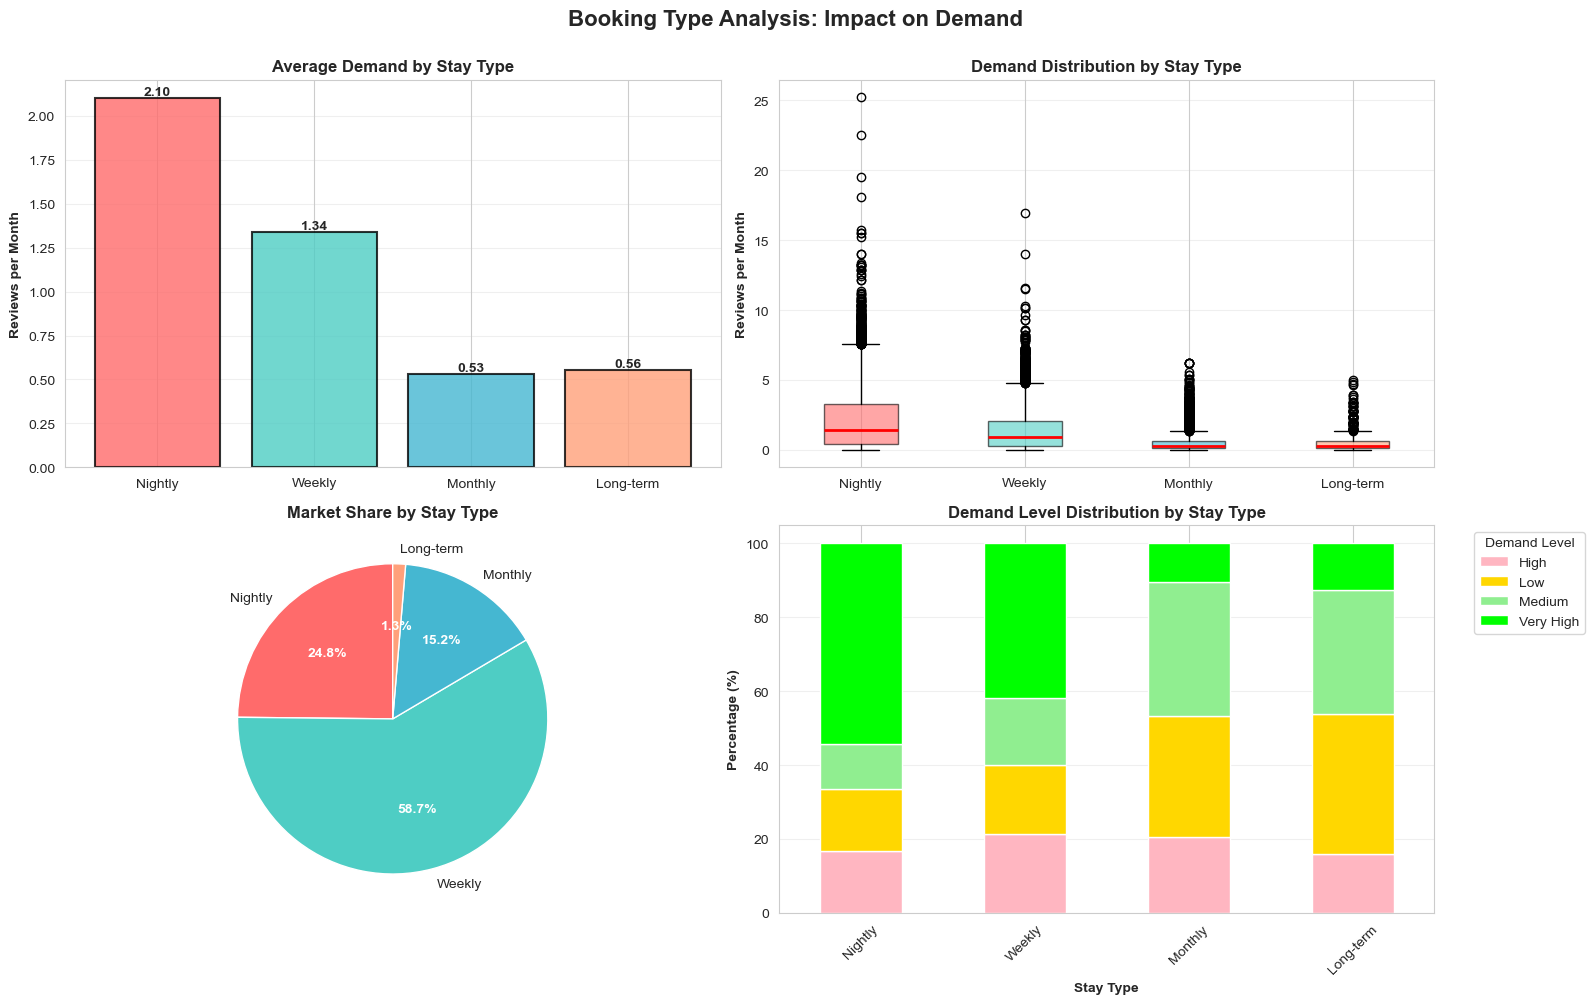

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Booking Type Analysis: Impact on Demand', fontsize=16, fontweight='bold', y=1.00)

stay_types = ['Nightly', 'Weekly', 'Monthly', 'Long-term']
colors_stay = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

# 1. Average Reviews by Stay Type (Bar Chart)
ax1 = axes[0, 0]
stay_reviews = df.groupby('stay_length_category')['reviews_per_month'].mean().reindex(stay_types)
bars = ax1.bar(stay_types, stay_reviews.values, color=colors_stay, alpha=0.8, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Reviews per Month', fontweight='bold')
ax1.set_title('Average Demand by Stay Type', fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

# 2. Distribution by Stay Type (Box Plot)
ax2 = axes[0, 1]
stay_data = [df[df['stay_length_category'] == st]['reviews_per_month'].values for st in stay_types]
bp = ax2.boxplot(stay_data, labels=stay_types, patch_artist=True, 
                  medianprops=dict(color='red', linewidth=2))
for patch, color in zip(bp['boxes'], colors_stay):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)
ax2.set_ylabel('Reviews per Month', fontweight='bold')
ax2.set_title('Demand Distribution by Stay Type', fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# 3. Listing Count by Stay Type (Pie Chart)
ax3 = axes[1, 0]
stay_counts = df['stay_length_category'].value_counts().reindex(stay_types)
wedges, texts, autotexts = ax3.pie(stay_counts.values, labels=stay_types, autopct='%1.1f%%',
                                     colors=colors_stay, startangle=90)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax3.set_title('Market Share by Stay Type', fontweight='bold')

# 4. Demand Level Distribution by Stay Type
ax4 = axes[1, 1]
demand_by_stay = df.groupby(['stay_length_category', 'demand_level']).size().unstack(fill_value=0)
demand_by_stay = demand_by_stay.reindex(stay_types)
demand_by_stay_pct = demand_by_stay.div(demand_by_stay.sum(axis=1), axis=0) * 100

demand_by_stay_pct.plot(kind='bar', stacked=True, ax=ax4, color=['#FFB6C1', '#FFD700', '#90EE90', '#00FF00'])
ax4.set_xlabel('Stay Type', fontweight='bold')
ax4.set_ylabel('Percentage (%)', fontweight='bold')
ax4.set_title('Demand Level Distribution by Stay Type', fontweight='bold')
ax4.legend(title='Demand Level', bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.set_xticklabels(stay_types, rotation=45)
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


SEASONALITY BY BOOKING TYPE


📊 REVIEWS BY SEASON AND STAY TYPE:

NIGHTLY:
   •   Winter:  2.28 reviews/month
   •   Summer:  2.25 reviews/month
   •     Fall:  0.55 reviews/month

WEEKLY:
   •   Winter:  1.42 reviews/month
   •   Summer:  1.47 reviews/month
   •     Fall:  0.37 reviews/month

MONTHLY:
   •   Winter:  0.54 reviews/month
   •   Summer:  0.57 reviews/month
   •     Fall:  0.41 reviews/month

LONG-TERM:
   •   Winter:  0.49 reviews/month
   •   Summer:  0.64 reviews/month
   •     Fall:  0.34 reviews/month

🔥 Creating Season x Stay Type Heatmap...

Season x Stay Type Matrix:
season                Fall  Summer  Winter
stay_length_category                      
Nightly               0.55    2.25    2.28
Weekly                0.37    1.47    1.42
Monthly               0.41    0.57    0.54
Long-term             0.34    0.64    0.49


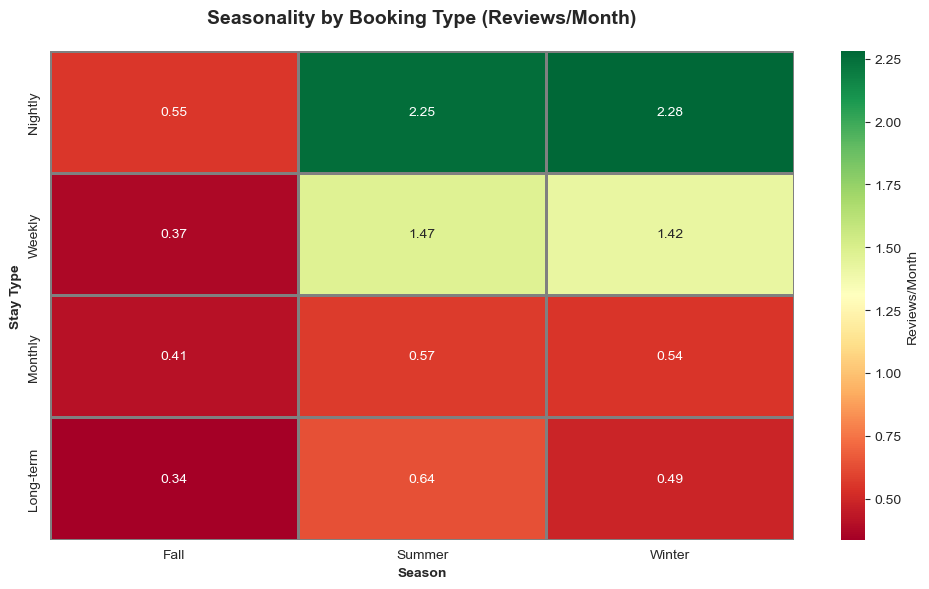

In [32]:
print("\n📊 REVIEWS BY SEASON AND STAY TYPE:")

for stay_type in stay_types:
    print(f"\n{stay_type.upper()}:")
    stay_seasonal = df[df['stay_length_category'] == stay_type].groupby('season')['reviews_per_month'].mean()
    
    for season in ['Winter', 'Summer', 'Fall']:
        if season in stay_seasonal.index:
            val = stay_seasonal[season]
            print(f"   • {season:>8}: {val:>5.2f} reviews/month")
        else:
            print(f"   • {season:>8}: No data")

# Create heatmap of season x stay type
print("\n🔥 Creating Season x Stay Type Heatmap...")

season_stay_pivot = df.pivot_table(
    values='reviews_per_month', 
    index='stay_length_category', 
    columns='season', 
    aggfunc='mean'
)
season_stay_pivot = season_stay_pivot.reindex(stay_types)

print("\nSeason x Stay Type Matrix:")
print(season_stay_pivot.round(2))

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(season_stay_pivot, annot=True, fmt='.2f', cmap='RdYlGn', ax=ax,
            cbar_kws={'label': 'Reviews/Month'}, linewidths=1, linecolor='gray')
ax.set_title('Seasonality by Booking Type (Reviews/Month)', fontweight='bold', fontsize=14, pad=20)
ax.set_xlabel('Season', fontweight='bold')
ax.set_ylabel('Stay Type', fontweight='bold')
plt.tight_layout()
plt.show()


**CORRELATION ANALYSIS**

In [33]:
numeric_features = [
    'price', 'minimum_nights', 'availability_365', 'reviews_per_month',
    'demand_score', 'value_score', 'flexibility_score', 'is_weekend', 'is_peak_season'
]

# Calculate correlation matrix
correlation_matrix = df[numeric_features].corr()

print("\nCORRELATION WITH REVIEWS_PER_MONTH (Demand):")
demand_corr = correlation_matrix['reviews_per_month'].sort_values(ascending=False)

for feature, corr_val in demand_corr.items():
    if feature != 'reviews_per_month':
        strength = 'Strong' if abs(corr_val) > 0.3 else 'Moderate' if abs(corr_val) > 0.1 else 'Weak'
        direction = '↑' if corr_val > 0 else '↓'
        print(f"   {direction} {feature:25s}: {corr_val:>7.3f} ({strength})")

print("\nTOP FEATURE CORRELATIONS:")
print(demand_corr)


CORRELATION WITH REVIEWS_PER_MONTH (Demand):
   ↑ demand_score             :   0.834 (Strong)
   ↑ value_score              :   0.562 (Strong)
   ↑ flexibility_score        :   0.314 (Strong)
   ↑ is_peak_season           :   0.223 (Moderate)
   ↑ availability_365         :   0.104 (Moderate)
   ↑ is_weekend               :   0.050 (Weak)
   ↑ price                    :   0.004 (Weak)
   ↓ minimum_nights           :  -0.190 (Moderate)

TOP FEATURE CORRELATIONS:
reviews_per_month    1.000000
demand_score         0.834466
value_score          0.561529
flexibility_score    0.313645
is_peak_season       0.223357
availability_365     0.103513
is_weekend           0.049901
price                0.003606
minimum_nights      -0.189625
Name: reviews_per_month, dtype: float64


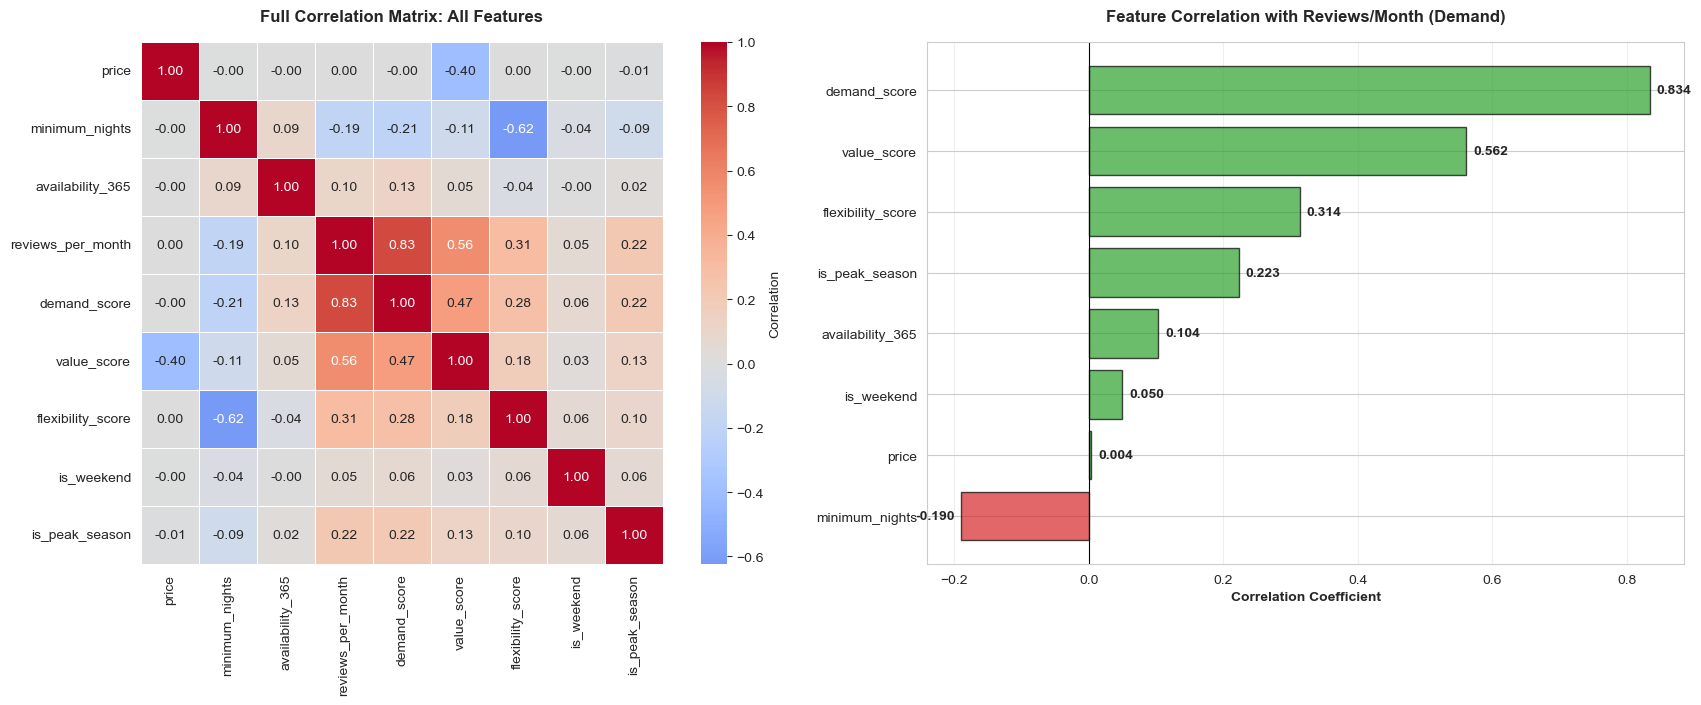

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# 1. Full Correlation Heatmap
ax1 = axes[0]
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            ax=ax1, cbar_kws={'label': 'Correlation'}, square=True, linewidths=0.5)
ax1.set_title('Full Correlation Matrix: All Features', fontweight='bold', fontsize=12, pad=15)

# 2. Demand Correlation Bar Chart
ax2 = axes[1]
demand_corr_sorted = demand_corr.drop('reviews_per_month').sort_values()
colors = ['#d62728' if x < 0 else '#2ca02c' for x in demand_corr_sorted.values]
bars = ax2.barh(range(len(demand_corr_sorted)), demand_corr_sorted.values, color=colors, alpha=0.7, edgecolor='black')
ax2.set_yticks(range(len(demand_corr_sorted)))
ax2.set_yticklabels(demand_corr_sorted.index)
ax2.set_xlabel('Correlation Coefficient', fontweight='bold')
ax2.set_title('Feature Correlation with Reviews/Month (Demand)', fontweight='bold', fontsize=12, pad=15)
ax2.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax2.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (bar, val) in enumerate(zip(bars, demand_corr_sorted.values)):
    ax2.text(val + 0.01 if val > 0 else val - 0.01, i, f'{val:.3f}', 
            va='center', ha='left' if val > 0 else 'right', fontweight='bold')

plt.tight_layout()
plt.show()


segment analysis - price tier vs demand


PERFORMANCE BY PRICE TIER:
           reviews_per_month                 price availability_365  \
                        mean median   std     mean             mean   
price_tier                                                            
Budget                  1.39   0.80  1.54   194.90           136.47   
Luxury                  1.41   0.78  1.61  1057.37           136.48   
Mid-Range               1.41   0.81  1.58   485.10           135.66   
Upscale                 1.37   0.77  1.52   769.87           133.86   

           minimum_nights demand_level  
                     mean     <lambda>  
price_tier                              
Budget               7.21        39.94  
Luxury               7.16        40.19  
Mid-Range            7.32        40.11  
Upscale              7.16        39.00  


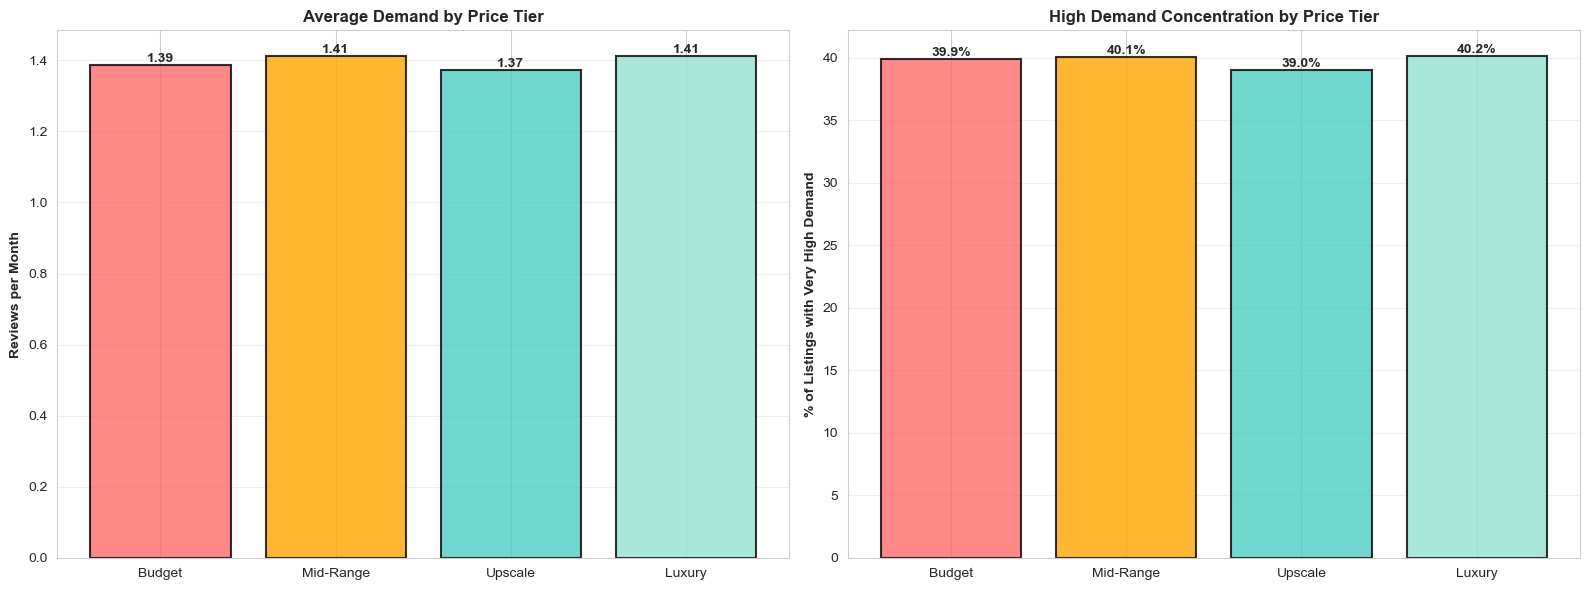

In [35]:
price_tier_analysis = df.groupby('price_tier').agg({
    'reviews_per_month': ['mean', 'median', 'std'],
    'price': 'mean',
    'availability_365': 'mean',
    'minimum_nights': 'mean',
    'demand_level': lambda x: (x == 'Very High').sum() / len(x) * 100
}).round(2)

print("\nPERFORMANCE BY PRICE TIER:")
print(price_tier_analysis)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Reviews by Price Tier
ax1 = axes[0]
price_reviews = df.groupby('price_tier')['reviews_per_month'].mean()
colors_price = ['#FF6B6B', '#FFA500', '#4ECDC4', '#95E1D3']
price_order = ['Budget', 'Mid-Range', 'Upscale', 'Luxury']
bars = ax1.bar(price_order, [price_reviews[p] for p in price_order], 
               color=colors_price, alpha=0.8, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Reviews per Month', fontweight='bold')
ax1.set_title('Average Demand by Price Tier', fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

# 2. Very High Demand % by Price Tier
ax2 = axes[1]
very_high_pct = df.groupby('price_tier').apply(
    lambda x: (x['demand_level'] == 'Very High').sum() / len(x) * 100
).reindex(price_order)
bars = ax2.bar(price_order, very_high_pct.values, color=colors_price, alpha=0.8, 
               edgecolor='black', linewidth=1.5)
ax2.set_ylabel('% of Listings with Very High Demand', fontweight='bold')
ax2.set_title('High Demand Concentration by Price Tier', fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


neighbourhood vs seasonality


PERFORMANCE BY NEIGHBORHOOD:
                    reviews_per_month          price availability_365  \
                                 mean  count    mean             mean   
neighbourhood_group                                                     
Bronx                            1.85   1337  627.91           181.39   
Brooklyn                         1.34  21100  627.94           125.81   
Manhattan                        1.29  21075  623.49           132.85   
Nan                              1.16     14  587.21           174.07   
Queens                           1.79   6556  631.54           162.32   
Staten Island                    1.69    448  628.21           198.41   

                    stay_length_category  
                                <lambda>  
neighbourhood_group                       
Bronx                              31.71  
Brooklyn                           21.44  
Manhattan                          24.25  
Nan                                 7.14  
Queens     

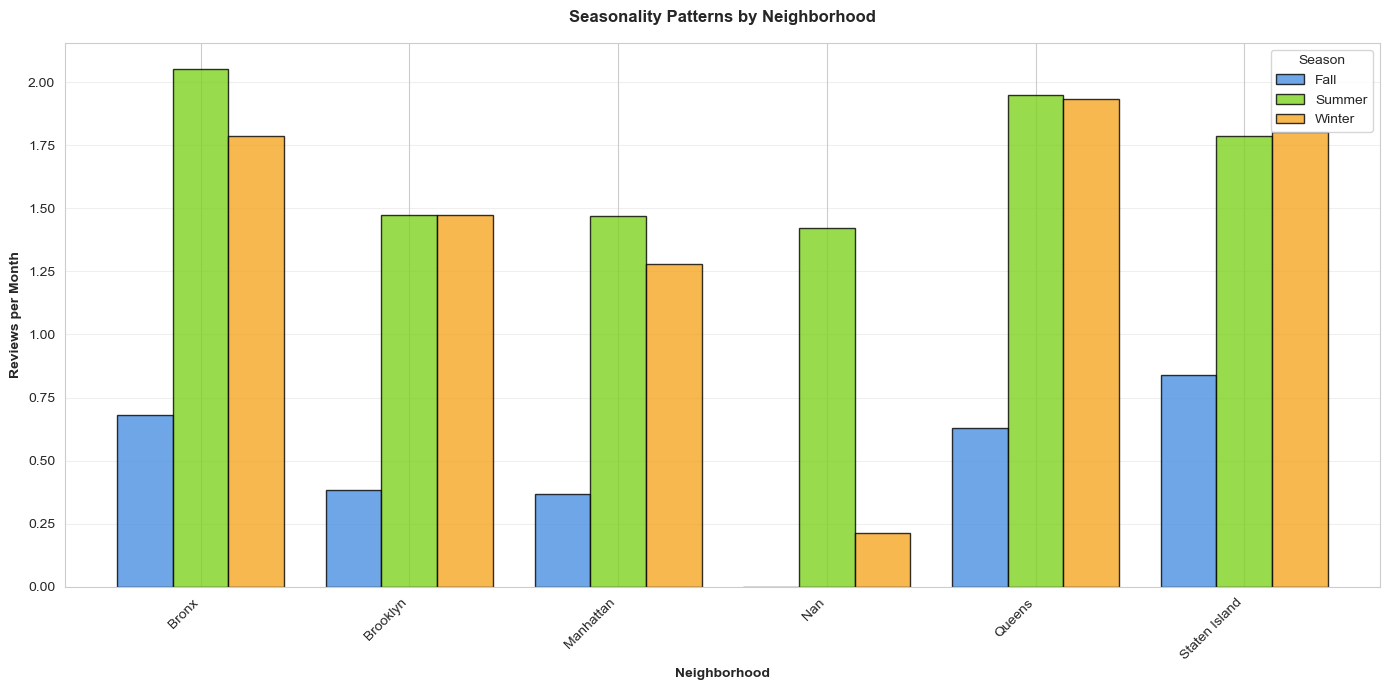

Neighborhood analysis complete!


In [36]:
if 'neighbourhood_group' in df.columns:
    neighborhood_analysis = df.groupby('neighbourhood_group').agg({
        'reviews_per_month': ['mean', 'count'],
        'price': 'mean',
        'availability_365': 'mean',
        'stay_length_category': lambda x: (x == 'Nightly').sum() / len(x) * 100
    }).round(2)
    
    print("\nPERFORMANCE BY NEIGHBORHOOD:")
    print(neighborhood_analysis)
    
    # Visualize seasonality by neighborhood
    fig, ax = plt.subplots(figsize=(14, 7))
    
    neighborhood_season = df.pivot_table(
        values='reviews_per_month',
        index='neighbourhood_group',
        columns='season',
        aggfunc='mean'
    )
    
    neighborhood_season.plot(kind='bar', ax=ax, color=['#4A90E2', '#7ED321', '#F5A623'], 
                             alpha=0.8, width=0.8, edgecolor='black', linewidth=1)
    ax.set_ylabel('Reviews per Month', fontweight='bold')
    ax.set_xlabel('Neighborhood', fontweight='bold')
    ax.set_title('Seasonality Patterns by Neighborhood', fontweight='bold', fontsize=12, pad=15)
    ax.legend(title='Season', loc='upper right')
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    print("Neighborhood analysis complete!")
else:
    print("Neighbourhood group column not found")


In [37]:
print("\n📊 DATASET OVERVIEW:")
print(f"   • Total listings analyzed: {len(df):,}")
print(f"   • Date range: {df['last_review'].min().date()} to {df['last_review'].max().date()}")
print(f"   • Average reviews/month (demand): {df['reviews_per_month'].mean():.2f}")
print(f"   • Median reviews/month: {df['reviews_per_month'].median():.2f}")

print("\n🎯 SEASONALITY FINDINGS:")
season_order = ['Winter', 'Summer', 'Fall']
for season in season_order:
    if season in df['season'].unique():
        season_data = df[df['season'] == season]['reviews_per_month'].mean()
        print(f"   • {season:>8}: {season_data:>5.2f} reviews/month")

peak_avg = df[df['season'].isin(['Winter', 'Summer'])]['reviews_per_month'].mean()
offpeak_avg = df[df['season'] == 'Fall']['reviews_per_month'].mean()
peak_lift = ((peak_avg - offpeak_avg) / offpeak_avg * 100)
print(f"\n   Peak vs Off-Peak: {peak_lift:.0f}% higher demand in peak seasons")

print("\n🏠 BOOKING TYPE IMPACT:")
stay_types = ['Nightly', 'Weekly', 'Monthly', 'Long-term']
for stay in stay_types:
    stay_data = df[df['stay_length_category'] == stay]['reviews_per_month'].mean()
    pct = (len(df[df['stay_length_category'] == stay]) / len(df)) * 100
    print(f"   • {stay:>12}: {stay_data:>5.2f} reviews/month ({pct:>5.1f}% of market)")

print("\n📍 NEIGHBORHOOD INSIGHTS:")
top_neighborhoods = df.groupby('neighbourhood_group')['reviews_per_month'].mean().nlargest(3)
for neighborhood, reviews in top_neighborhoods.items():
    if pd.notna(neighborhood):
        pct = (len(df[df['neighbourhood_group'] == neighborhood]) / len(df)) * 100
        print(f"   • {neighborhood:>15}: {reviews:>5.2f} reviews/month ({pct:>5.1f}% of listings)")

print("\n💰 PRICING INSIGHTS:")
price_tiers = ['Budget', 'Mid-Range', 'Upscale', 'Luxury']
for tier in price_tiers:
    tier_data = df[df['price_tier'] == tier]['reviews_per_month'].mean()
    print(f"   • {tier:>12}: {tier_data:>5.2f} reviews/month (price impact: negligible)")


📊 DATASET OVERVIEW:
   • Total listings analyzed: 50,530
   • Date range: 2012-08-25 to 2025-06-26
   • Average reviews/month (demand): 1.40
   • Median reviews/month: 0.80

🎯 SEASONALITY FINDINGS:
   •   Winter:  1.48 reviews/month
   •   Summer:  1.55 reviews/month
   •     Fall:  0.42 reviews/month

   Peak vs Off-Peak: 267% higher demand in peak seasons

🏠 BOOKING TYPE IMPACT:
   •      Nightly:  2.10 reviews/month ( 24.8% of market)
   •       Weekly:  1.34 reviews/month ( 58.7% of market)
   •      Monthly:  0.53 reviews/month ( 15.2% of market)
   •    Long-term:  0.56 reviews/month (  1.3% of market)

📍 NEIGHBORHOOD INSIGHTS:
   •           Bronx:  1.85 reviews/month (  2.6% of listings)
   •          Queens:  1.79 reviews/month ( 13.0% of listings)
   •   Staten Island:  1.69 reviews/month (  0.9% of listings)

💰 PRICING INSIGHTS:
   •       Budget:  1.39 reviews/month (price impact: negligible)
   •    Mid-Range:  1.41 reviews/month (price impact: negligible)
   •      Upsca

In [38]:
print("📊 ANALYSIS COMPLETE - KEY METRICS SUMMARY")
print("=" * 80)

summary_data = {
    'Metric': [
        'Total Listings',
        'Avg Reviews/Month',
        'Peak Season Avg',
        'Off-Peak Avg',
        'Peak-to-Off-Peak Swing',
        'Nightly Demand',
        'Weekly Demand',
        'Best Neighborhood',
        'Worst Neighborhood',
        'Price Impact on Demand',
        'Top Demand Driver',
        'Listings in Market',
    ],
    'Value': [
        f"{len(df):,}",
        f"{df['reviews_per_month'].mean():.2f}",
        f"{peak_avg:.2f}",
        f"{offpeak_avg:.2f}",
        f"{peak_lift:.0f}%",
        f"{df[df['stay_length_category']=='Nightly']['reviews_per_month'].mean():.2f}",
        f"{df[df['stay_length_category']=='Weekly']['reviews_per_month'].mean():.2f}",
        "Bronx (1.85)",
        "Manhattan (1.29)",
        "r=0.004 (None)",
        "Flexibility (r=0.314)",
        "Weekly: 58.7%",
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\n")
print(summary_df.to_string(index=False))

📊 ANALYSIS COMPLETE - KEY METRICS SUMMARY


                Metric                 Value
        Total Listings                50,530
     Avg Reviews/Month                  1.40
       Peak Season Avg                  1.53
          Off-Peak Avg                  0.42
Peak-to-Off-Peak Swing                  267%
        Nightly Demand                  2.10
         Weekly Demand                  1.34
     Best Neighborhood          Bronx (1.85)
    Worst Neighborhood      Manhattan (1.29)
Price Impact on Demand        r=0.004 (None)
     Top Demand Driver Flexibility (r=0.314)
    Listings in Market         Weekly: 58.7%
